Movielens Project

In [1]:
#predictive  odel for ratings 
#import all necesary libs
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#warnings man-h
import seaborn as sns
#import ProfileReport from pandas_profiling
import pandas_profiling as pf
#from pandas_profiling import describe
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#did not work ion VSc
import re


# test split and double classifiers
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score 
#Not sure if need last 2
from lightgbm import LGBMClassifier
#as ltb]]
import xgboost
#\ additional division protocol
#import

#additional gradient boosting framework/ newer update

In [2]:
#bringingdata
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [3]:
rating_df = pd.read_csv('C:\\Users\\swank\\Desktop\\DSc2\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\ratings.dat', header=None, delimiter='::', names=rating)
print(rating_df.head())
print()
print(rating_df.shape)

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

(1000209, 4)


In [4]:
user_df = pd.read_csv('C:\\Users\\swank\\Desktop\\DSc2\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\users.dat', header=None,delimiter='::', names=user)
print(user_df.head())
print()
print(user_df.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

(6040, 5)


In [5]:
movie_df = pd.read_csv('C:\\Users\\swank\\Desktop\\DSc2\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\movies.dat', header=None, delimiter='::', names=movie, encoding='latin-1')
print(movie_df.head())
print()
print(movie_df.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


In [6]:
movie_df = pd.read_csv('C:\\Users\\swank\\Desktop\\DSc2\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\movies.dat', header=None, delimiter='::', names=movie, encoding='latin-1')
print(movie_df.head())
print()
print(movie_df.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


In [7]:
#How to merge a dataset in python, (no SQL) StackOverflow only
df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movie_df,how='outer',on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Rating      1000209 non-null  float64
 3   Timestamp   1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  float64
 6   Occupation  1000209 non-null  float64
 7   Zip-code    1000209 non-null  object 
 8   Title       1000386 non-null  object 
 9   Genres      1000386 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


In [9]:
df.shape

(1000386, 10)

<AxesSubplot:>

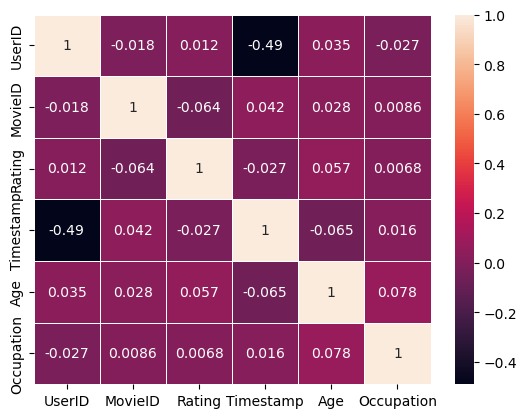

In [10]:
corr = df.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

In [ ]:
#pandas profile


pf.describe(df)
pfr = pf.ProfileReport(df)
pfr.to_file('Movielens_pfr.html')

In [ ]:
print('Na values in the data frame is :')
def is_na(x):
    for i in x.columns:
        print(i,'column',' :',x[i].isna().sum(),'\n')
is_na(df)

In [ ]:
df.dropna(inplace=True)
df.Rating.isna().value_counts()
#won't have new df
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

In [40]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 2.982e+03 3.893e+03 4.211e+03] 
 Total unique values is:  6040
----------------------------------------------------------------------
Column :  MovieID 
 [1193  661  914 ... 2845 3607 2909] 
 Total unique values is:  3706
----------------------------------------------------------------------
Column :  Rating 
 [5. 4. 3. 2. 1.] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.58846401e+08
 9.76029116e+08 9.57273353e+08] 
 Total unique values is:  458455
----------------------------------------------------------------------
Column :  Gender 
 ['F' 'M'] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35.] 
 Total unique values is:  7
----------------------------------------------------------------------
Column :  Occupati

<AxesSubplot:>

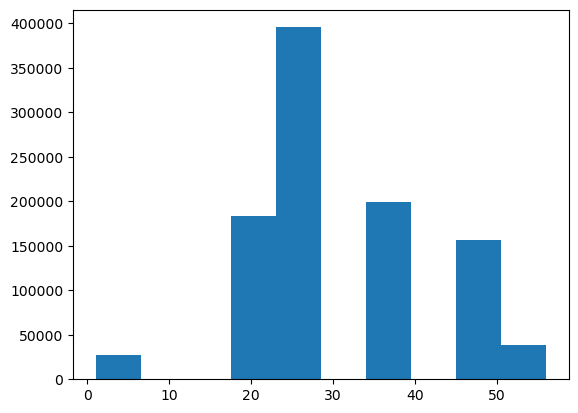

In [41]:

#Ages of Users
df.Age.hist(grid=False)
#last age recorded 55

In [42]:
#toy story shiz
def fn(x):
    return re.search("Toy Story".lower(), x.lower())!=None
title = df.iloc[0].Title
title

"One Flew Over the Cuckoo's Nest (1975)"

In [43]:
re_tit = df["Title"].apply(fn)
re_tit.head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [44]:
toystory = df[df["Title"].apply(fn)]
toystory

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022.0,3114,5.0,956755741.0,M,25.0,17.0,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024.0,3114,4.0,956749447.0,M,25.0,12.0,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027.0,3114,4.0,956726766.0,M,18.0,4.0,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036.0,3114,4.0,956710231.0,F,25.0,15.0,32603,Toy Story 2 (1999),Animation|Children's|Comedy


<AxesSubplot:>

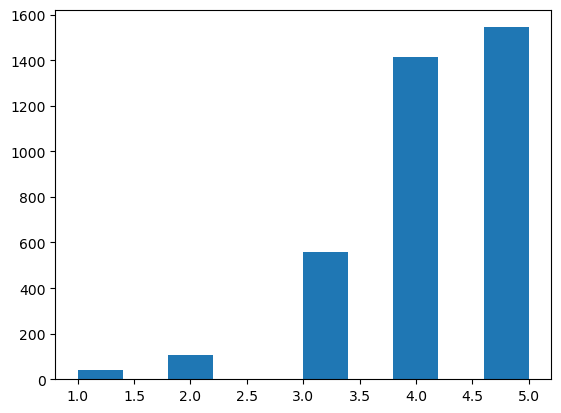

In [45]:
#rating of greatest movie ever made
toystory.Rating.hist(grid=False)

In [46]:
top_25 = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
#print 25 most beloved flicks
top_25

MovieID  Title                                                   
2858     American Beauty (1999)                                      3428
260      Star Wars: Episode IV - A New Hope (1977)                   2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)       2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)           2883
480      Jurassic Park (1993)                                        2672
                                                                     ... 
3237     Kestrel's Eye (Falkens öga) (1998)                             1
763      Last of the High Kings, The (a.k.a. Summer Fling) (1996)       1
624      Condition Red (1995)                                           1
2563     Beauty (1998)                                                  1
3290     Soft Toilet Seats (1999)                                       1
Name: Timestamp, Length: 3706, dtype: int64

In [47]:
#Top25
print('Top 25 movies by viewership rating')
print(top_25[:25])

Top 25 movies by viewership rating
MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                             

In [48]:
#usr 2696 reviews
usr_2696 = df.loc[df.UserID==2696, "Rating"].sort_values(ascending=False)
usr_2696.head(),usr_2696.shape

(250014    5.0
 609204    4.0
 612552    4.0
 244232    4.0
 689379    4.0
 Name: Rating, dtype: float64,
 (20,))

<AxesSubplot:>

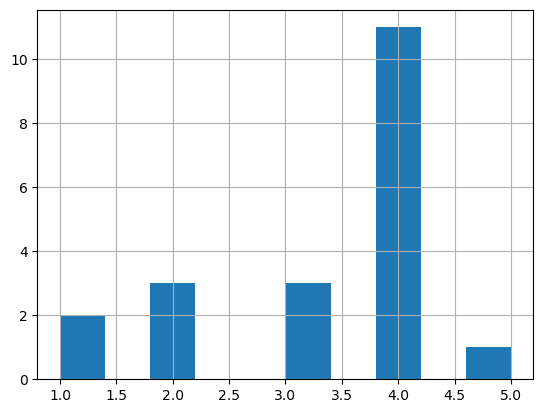

In [49]:
usr_2696.hist()

In [50]:
#genres
df.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [51]:
#gender-specific split
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1
#romance extense
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Horror', 'Crime', 'Animation', 'Action', 'Western', 'War', 'Drama', 'Sci-Fi', 'Film-Noir', 'Mystery', 'Fantasy', 'Comedy', 'Thriller', 'Documentary', "Children's", 'Adventure', 'Musical', 'Romance']

Length of the unique Genre :  18


In [52]:
#One Hotting- > moving variable 0
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [53]:
new_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_new = new_data.drop(['Title','Zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,M,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,M,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,M,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,M,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#print(gooddf/, df)
#can't name varible 1 off

print(df_new.columns)

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [56]:
#Encoding of df by gneder column
import category_encoders as ce
#df_new.Gender = pd.get_dummies(df_new.Gender)
#columns must be same length as key] error

In [57]:
x = df_new.drop(['UserID','MovieID','Rating'],axis=1)
x.shape

(1000209, 21)

In [58]:
# =Specific mov. ratigns
print('The features affecting the ratings of any particular movie:')
print()
#pr
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [59]:
y = df_new.Rating
y.shape

(1000209,)

In [60]:
x.Occupation.value_counts()

4.0     131032
0.0     130499
7.0     105425
1.0      85351
17.0     72816
20.0     60397
12.0     57214
2.0      50068
14.0     49109
16.0     46021
6.0      37205
3.0      31623
10.0     23290
15.0     22951
5.0      21850
11.0     20563
19.0     14904
13.0     13754
18.0     12086
9.0      11345
8.0       2706
Name: Occupation, dtype: int64

In [61]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(  Gender   Age  Occupation  Action  Adventure  Animation  Children's  Comedy  \
 0      F   1.0        10.0       0          0          0           0       0   
 1      M  56.0        16.0       0          0          0           0       0   
 2      M  25.0        12.0       0          0          0           0       0   
 3      M  25.0         7.0       0          0          0           0       0   
 4      M  50.0         1.0       0          0          0           0       0   
 
    Crime  Documentary  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0      0            0  ...                0                0                0   
 1      0            0  ...                0                0                0   
 2      0            0  ...                0                1                0   
 3      0            0  ...                0                0                0   
 4      0            0  ...                0                0                0   
 
    Occupation_14.

In [62]:
x = x.drop(['Occupation','Occupation_0.0'],axis=1)
x.head(3),x.shape

(  Gender   Age  Action  Adventure  Animation  Children's  Comedy  Crime  \
 0      F   1.0       0          0          0           0       0      0   
 1      M  56.0       0          0          0           0       0      0   
 2      M  25.0       0          0          0           0       0      0   
 
    Documentary  Drama  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0            0      1  ...                0                0                0   
 1            0      1  ...                0                0                0   
 2            0      1  ...                0                1                0   
 
    Occupation_14.0  Occupation_15.0  Occupation_16.0  Occupation_17.0  \
 0                0                0                0                0   
 1                0                0                1                0   
 2                0                0                0                0   
 
    Occupation_18.0  Occupation_19.0  Occupation_20.0  
 0        

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 10, stratify = y) #wont' work
lgb = LGBMClassifier(boosting_type = 'gbdt', n_jobs= -1, objective='multiclass')
#final var assignment

#lgb.fit(x_train,y_train)

#Needs to be boolean

In [64]:
#test row
from sklearn import preprocessing 
#lbl = preprocessing.LabelEncoder() 
#train_x['acc_id1'] = lbl.fit_transform(train_x['acc_id1'].astype(str)


In [66]:
#nulls in gender column, have to impute

lgb.fit(x_train, y_train)
#error boolean type

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Gender

In [67]:
y_pred = lgb.predict(x_test)

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [68]:
print('LGBM accuracy score is : ', accuracy_score(y_test,y_pred)*100)

NameError: name 'y_pred' is not defined

In [69]:
xgb = xgboost.XGBClassifier(n_jobs=-1)

In [70]:
xgb.fit(x_train,y_train)
#xgp.fix --rot, y
#working so far

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]

In [71]:
y_pred_xgb = xgb.predict(x_test)
#Didn't work first time, debugh


NotFittedError: need to call fit or load_model beforehand

In [72]:
print('XGB accuracy score is : ', accuracy_score(y_test,y_pred_xgb )*100) #lgbm acc: is 36.19

NameError: name 'y_pred_xgb' is not defined